# Explore here

In [97]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectKBest, f_regression
from joblib import dump
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import MinMaxScaler


dataframe = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv',
                           delimiter=',',
                           skipinitialspace=True,
                           engine='python')

dataframe.head(5)

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [98]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [99]:
dataframe.describe()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,...,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,30401.640764,1.041894e+05,1.274030e+04,11.871051,1.336798e+04,12.694609,1.446933e+04,12.283979,1.391649e+04,11.751535,...,5827.242357,13.073503,12.088089,14.053726,9326.577707,3.446242,3.207516,3.710478,2466.234076,4.635350
std,15150.559265,3.335834e+05,4.180730e+04,2.124081,4.228439e+04,1.815044,4.957773e+04,3.126297,4.899095e+04,1.696599,...,15720.551934,2.724351,2.622948,2.824828,29754.601185,0.568059,0.527740,0.613069,7730.422067,1.510447
min,1001.000000,8.800000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.100000e+01,6.092789,...,7.000000,6.100000,5.500000,6.700000,11.000000,1.800000,1.700000,1.900000,3.000000,1.000000
25%,18180.500000,1.096325e+04,1.280500e+03,10.594639,1.374500e+03,11.674504,1.263750e+03,10.496774,1.232750e+03,10.689322,...,815.000000,11.200000,10.300000,12.100000,1187.750000,3.100000,2.900000,3.300000,314.750000,3.000000
50%,29178.000000,2.580050e+04,3.057000e+03,11.802727,3.274000e+03,12.687422,3.108000e+03,11.772649,3.000500e+03,11.580861,...,1963.500000,12.800000,11.800000,13.800000,2743.000000,3.400000,3.200000,3.700000,718.000000,5.000000
75%,45081.500000,6.791300e+04,8.097000e+03,12.951840,8.822250e+03,13.659282,8.976250e+03,13.182260,8.314250e+03,12.639379,...,4727.000000,14.800000,13.700000,15.900000,6679.250000,3.800000,3.500000,4.100000,1776.250000,6.000000
max,56045.000000,1.010552e+07,1.208253e+06,25.460677,1.239139e+06,23.304372,1.557073e+06,37.570198,1.501844e+06,22.225129,...,434075.000000,25.600000,24.200000,27.000000,952335.000000,6.200000,5.800000,6.600000,237766.000000,6.000000


In [100]:
if dataframe.isnull().sum().sum() > 0 or dataframe.isna().sum().sum():
    dataframe.dropna(axis=1, how=all, inplace=True).reset_index(drop=True)
    print("[+] There are missing values in the dataset")


if dataframe.duplicated().sum() > 0:
    dataframe.drop_duplicates(inplace=True)
    print("[+] There are duplicated values in the dataset")

dataframe = dataframe.select_dtypes(include=['float64', 'int64'])

dataframe.describe()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,...,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,30401.640764,1.041894e+05,1.274030e+04,11.871051,1.336798e+04,12.694609,1.446933e+04,12.283979,1.391649e+04,11.751535,...,5827.242357,13.073503,12.088089,14.053726,9326.577707,3.446242,3.207516,3.710478,2466.234076,4.635350
std,15150.559265,3.335834e+05,4.180730e+04,2.124081,4.228439e+04,1.815044,4.957773e+04,3.126297,4.899095e+04,1.696599,...,15720.551934,2.724351,2.622948,2.824828,29754.601185,0.568059,0.527740,0.613069,7730.422067,1.510447
min,1001.000000,8.800000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.100000e+01,6.092789,...,7.000000,6.100000,5.500000,6.700000,11.000000,1.800000,1.700000,1.900000,3.000000,1.000000
25%,18180.500000,1.096325e+04,1.280500e+03,10.594639,1.374500e+03,11.674504,1.263750e+03,10.496774,1.232750e+03,10.689322,...,815.000000,11.200000,10.300000,12.100000,1187.750000,3.100000,2.900000,3.300000,314.750000,3.000000
50%,29178.000000,2.580050e+04,3.057000e+03,11.802727,3.274000e+03,12.687422,3.108000e+03,11.772649,3.000500e+03,11.580861,...,1963.500000,12.800000,11.800000,13.800000,2743.000000,3.400000,3.200000,3.700000,718.000000,5.000000
75%,45081.500000,6.791300e+04,8.097000e+03,12.951840,8.822250e+03,13.659282,8.976250e+03,13.182260,8.314250e+03,12.639379,...,4727.000000,14.800000,13.700000,15.900000,6679.250000,3.800000,3.500000,4.100000,1776.250000,6.000000
max,56045.000000,1.010552e+07,1.208253e+06,25.460677,1.239139e+06,23.304372,1.557073e+06,37.570198,1.501844e+06,22.225129,...,434075.000000,25.600000,24.200000,27.000000,952335.000000,6.200000,5.800000,6.600000,237766.000000,6.000000


In [101]:
def identify_outliers(df):
    outlier_info = {}

    for col in df.select_dtypes(include='number').columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1 

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        if not outliers.empty:
            outlier_info[col] = {
                'outliers_count': outliers.shape[0],
                'lower_bound': lower_bound,
                'upper_bound': upper_bound,
                'outlier_values': outliers[col].tolist()
            }

    for col, info in outlier_info.items():
        print(f"Column: {col}")
        print(f"  Number of outliers: {info['outliers_count']}")
        print(f"  Low Limit: {info['lower_bound']}")
        print(f"  High Limit: {info['upper_bound']}")
        print(f"  Outliers: {info['outlier_values'][:5]}...\n")
    return outlier_info

In [102]:
def remove_outliers(df, outlier_info):
    
    for col, info in outlier_info.items():
        lower_limit = info['lower_bound']
        upper_limit = info['upper_bound']
        
        if lower_limit < 0:
            df = df[df[col] >= lower_limit]
        if upper_limit > 0:
            df = df[df[col] <= upper_limit]

        
    return df

In [103]:
outlier_info = identify_outliers(dataframe)

Column: TOT_POP
  Number of outliers: 432
  Low Limit: -74461.375
  High Limit: 153337.625
  Outliers: [218022, 659300, 163941, 366519, 413757]...

Column: 0-9
  Number of outliers: 429
  Low Limit: -8944.25
  High Limit: 18321.75
  Outliers: [24757, 83866, 19180, 43078, 53407]...

Column: 0-9 y/o % of total pop
  Number of outliers: 114
  Low Limit: 7.0588377662499955
  High Limit: 16.487640596250003
  Outliers: [6.360300542, 21.51954326, 19.6, 25.46067686, 17.2652804]...

Column: 19-Oct
  Number of outliers: 431
  Low Limit: -9797.125
  High Limit: 19993.875
  Outliers: [26913, 82823, 23398, 46922, 53561]...

Column: 10-19 y/o % of total pop
  Number of outliers: 137
  Low Limit: 8.697336139999999
  High Limit: 16.63644994
  Outliers: [6.569980779, 17.6438296, 8.665906499, 18.59568831, 16.95643485]...

Column: 20-29
  Number of outliers: 438
  Low Limit: -10305.0
  High Limit: 20545.0
  Outliers: [23579, 91855, 34582, 50959, 57388]...

Column: 20-29 y/o % of total pop
  Number of out

In [104]:
def remove_outliers(df, outlier_info):
    
    for col, info in outlier_info.items():
        lower_limit = info['lower_bound']
        upper_limit = info['upper_bound']
        
        if lower_limit < 0:
            df = df[df[col] >= lower_limit]
        if upper_limit > 0:
            df = df[df[col] <= upper_limit]

        
    return df

In [105]:
df_without_outliers = remove_outliers(dataframe.copy(), outlier_info=outlier_info)
df_without_outliers.describe().round(2)

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,1036.00,1036.00,1036.00,1036.00,1036.00,1036.00,1036.00,1036.00,1036.00,1036.00,...,1036.00,1036.00,1036.00,1036.00,1036.00,1036.00,1036.00,1036.00,1036.00,1036.00
mean,28614.27,25643.53,2994.02,11.74,3250.41,12.66,3001.87,11.30,2949.89,11.31,...,1955.25,13.00,11.96,14.04,2571.90,3.44,3.19,3.72,675.62,5.00
std,13892.33,19858.18,2336.16,1.40,2545.34,1.19,2490.39,1.43,2369.07,1.04,...,1535.51,1.88,1.81,1.95,1969.30,0.36,0.33,0.39,508.77,1.28
min,1001.00,465.00,55.00,7.32,47.00,8.57,52.00,7.89,37.00,7.77,...,24.00,7.90,7.30,8.60,37.00,2.40,2.30,2.60,11.00,2.00
25%,18164.00,10870.00,1281.75,10.81,1384.75,11.92,1212.00,10.31,1204.00,10.62,...,797.50,11.60,10.60,12.58,1133.25,3.20,3.00,3.40,304.00,4.00
50%,27037.00,19995.50,2273.00,11.77,2543.50,12.67,2275.50,11.21,2253.50,11.23,...,1517.50,12.90,11.90,14.00,2045.50,3.40,3.20,3.70,537.00,6.00
75%,39383.00,35872.25,4192.75,12.60,4543.25,13.38,4161.50,12.04,4186.00,11.87,...,2690.50,14.40,13.32,15.50,3522.50,3.70,3.40,4.00,922.00,6.00
max,55141.00,117360.00,15330.00,16.40,16247.00,16.51,15146.00,16.89,16085.00,15.53,...,9070.00,18.80,17.40,20.20,11540.00,4.60,4.30,4.90,2805.00,6.00


In [106]:
def train_split(target, dataframe, test_size=0.2, random_state=42):
    return train_test_split(dataframe.drop(columns=target), dataframe[target], test_size=test_size, random_state=random_state)


In [107]:
def standard_scaler(X_train, X_test, filename: str):

    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train_norm = scaler.transform(X_train)
    X_test_norm = scaler.transform(X_test)

    X_train_norm = pd.DataFrame(X_train_norm, index=X_train.index, columns=X_train.columns)
    X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=X_test.columns)

    dump(scaler, f'../data/processed/std_transform_{filename}.sav')

    return X_train_norm, X_test_norm

def min_max_scaler(X_train, X_test, reference: str):
    
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    
    X_train_minmax = scaler.transform(X_train)
    X_train_minmax = pd.DataFrame(X_train_minmax, index = X_train.index, columns=X_train.columns)

    X_test_minmax = scaler.transform(X_test)
    X_test_minmax = pd.DataFrame(X_test_minmax, index = X_test.index, columns=X_test.columns)
    
    dump(scaler, f'../data/processed/minmax_{reference}.sav')

    return X_train_minmax, X_test_minmax


In [108]:
TARGET = 'diabetes_prevalence'

X_train_with_outliers, X_test_with_outliers, y_train, y_test = train_split(TARGET, dataframe, test_size=0.2, random_state=42)
X_train_without_outliers, X_test_without_outliers, y_train_without_outliers, y_test_without_outliers  = train_split(TARGET, df_without_outliers, test_size=0.2, random_state=42)

#Default
X_train_with_outliers.to_csv('../data/processed/X_train_with_outliers_ts_02_rs_42.csv', index=False)
X_test_with_outliers.to_csv('../data/processed/X_test_with_outliers_ts_02_rs_42.csv', index=False)

y_train.to_csv('../data/processed/y_train.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)

#Without outliers
X_train_without_outliers.to_csv('../data/processed/X_train_without_outliers_ts_02_rs_42.csv', index=False)
X_test_without_outliers.to_csv('../data/processed/X_test_without_outliers_ts_02_rs_42.csv', index=False)

y_train_without_outliers.to_csv('../data/processed/y_train_without_outliers.csv', index=False)
y_test_without_outliers.to_csv('../data/processed/y_test_without_outliers.csv', index=False)

In [109]:
X_train_with_outliers_std, X_test_with_outliers_std = standard_scaler(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_without_outliers_std, X_test_without_outliers_std = standard_scaler(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

X_train_with_outliers_minmax, X_test_with_outliers_minmax = min_max_scaler(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_without_outliers_minmax, X_test_without_outliers_minmax = min_max_scaler(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

In [110]:
def select_k_best(X_train, X_test, y_train, k, filename: str):

    selection_model = SelectKBest(f_regression, k=k)
    selection_model.fit(X_train, y_train)
    cols = selection_model.get_support()

    dump(selection_model, f'../data/processed/selection_model_{filename}.sav')

    return pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns.values[cols]) , pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns.values[cols])

In [111]:
K = 10
X_train_with_outliers_selected, X_test_with_outliers_selected = select_k_best(X_train_with_outliers, X_test_with_outliers, y_train, K, 'with_outliers')
X_train_without_outliers_selected, X_test_without_outliers_selected = select_k_best(X_train_without_outliers, X_test_without_outliers, y_train_without_outliers, K, 'without_outliers')

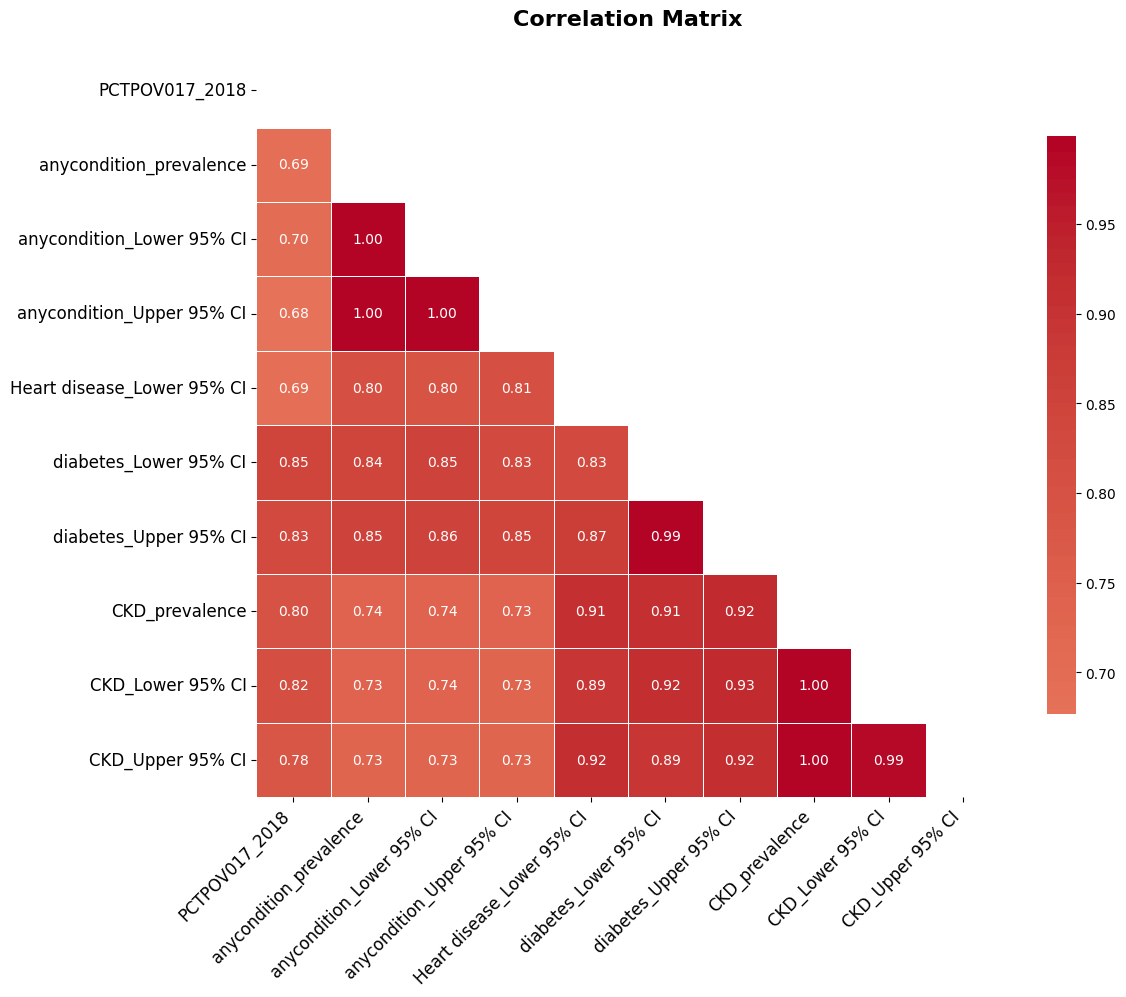

In [112]:
# Correlation heatmap

import numpy as np
import seaborn as sns

plt.figure(figsize=(12, 10))

corr_matrix = X_train_with_outliers_selected.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(
    corr_matrix, 
    mask=mask,
    annot=True, 
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.75},
    annot_kws={"size": 10}
)

plt.title("Correlation Matrix", fontsize=16, fontweight="bold", pad=20)
plt.xticks(fontsize=12, rotation=45, ha="right")
plt.yticks(fontsize=12)

plt.show()

In [113]:
dataframe = dataframe.select_dtypes('number')

X = dataframe.drop(columns=['diabetes_prevalence'])
y = dataframe['diabetes_prevalence']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns.values)
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns.values)

X_train_scaled.describe()


,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_Upper 95% CI,COPD_number,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,2.512000e+03,2.512000e+03,2.512000e+03,2.512000e+03,2.512000e+03,2.512000e+03,2.512000e+03,2.512000e+03,2.512000e+03,2.512000e+03,...,2.512000e+03,2.512000e+03,2.512000e+03,2.512000e+03,2.512000e+03,2.512000e+03,2.512000e+03,2.512000e+03,2.512000e+03,2.512000e+03
mean,-4.242891e-18,-1.626441e-17,1.202152e-17,1.739585e-16,2.121445e-18,-2.517448e-16,-1.272867e-17,1.944658e-16,2.121445e-18,7.799847e-16,...,-1.244581e-16,-8.485781e-18,1.442583e-16,9.051500e-16,-2.262875e-17,-2.545734e-16,3.535742e-16,7.707918e-16,-1.555727e-17,1.782014e-16
std,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,...,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00
min,-1.971759e+00,-3.035163e-01,-2.969155e-01,-5.612753e+00,-3.073919e-01,-7.098214e+00,-2.843887e-01,-3.957972e+00,-2.771287e-01,-3.301082e+00,...,-2.390575e+00,-3.588589e-01,-2.528584e+00,-2.618092e+00,-3.034368e-01,-2.741963e+00,-2.687842e+00,-2.811085e+00,-3.088600e-01,-2.396653e+00
25%,-7.723448e-01,-2.725708e-01,-2.676992e-01,-6.040794e-01,-2.764360e-01,-5.705540e-01,-2.603573e-01,-5.808121e-01,-2.534599e-01,-6.267053e-01,...,-7.389374e-01,-3.091716e-01,-7.161740e-01,-6.868871e-01,-2.660748e-01,-6.030018e-01,-5.756659e-01,-6.638956e-01,-2.701451e-01,-1.073780e+00
50%,-9.589187e-02,-2.293035e-01,-2.259926e-01,-3.974008e-02,-2.335127e-01,-4.660695e-03,-2.241396e-01,-1.688700e-01,-2.186785e-01,-1.107449e-01,...,-4.755401e-02,-2.392960e-01,-9.918334e-02,-1.146781e-01,-2.160176e-01,-6.826168e-02,3.821975e-04,-3.221837e-03,-2.216170e-01,2.490918e-01
75%,1.019797e+00,-1.086787e-01,-1.109260e-01,4.996476e-01,-1.070594e-01,5.288919e-01,-1.108792e-01,2.856818e-01,-1.155079e-01,5.264489e-01,...,6.438293e-01,-7.211489e-02,6.045716e-01,6.363461e-01,-8.909711e-02,6.447252e-01,5.764303e-01,6.574519e-01,-9.018397e-02,9.105279e-01
max,1.687043e+00,2.778196e+01,2.653240e+01,6.189631e+00,2.690219e+01,5.910857e+00,2.881823e+01,7.182933e+00,2.815444e+01,6.079558e+00,...,4.484848e+00,2.530167e+01,4.643932e+00,4.462994e+00,2.932868e+01,4.922647e+00,4.992799e+00,4.786663e+00,2.814541e+01,9.105279e-01


In [114]:
selector = SelectKBest(score_func=f_regression, k=10)
selector.fit_transform(X_train_scaled, y_train)

selected_columns = X_train_scaled.columns[selector.get_support()]
X_train_selected = pd.DataFrame(selector.transform(X_train_scaled), columns=selected_columns)
X_test_selected = pd.DataFrame(selector.transform(X_test_scaled), columns=selected_columns)

X_train_selected.to_csv("../data/processed/X_train.csv")
X_test_selected.to_csv("../data/processed/X_test.csv")
y_train.to_csv("../data/processed/y_train.csv")
y_test.to_csv("../data/processed/y_test.csv")



In [115]:
linear_model = LinearRegression()
linear_model.fit(X_train_selected, y_train)

print(f"Intercept (a): {linear_model.intercept_}")
print(f"Coefficients (b1, b2): {linear_model.coef_}")

Intercept (a): 13.041640127388533
Coefficients (b1, b2): [ 7.67634620e-04  8.58850211e-01 -4.35889566e-01 -4.19773644e-01
 -3.52131103e-03  1.28558661e+00  1.40991533e+00  2.06933384e-02
 -5.79575902e-03 -1.29650862e-02]


In [116]:
y_pred = linear_model.predict(X_test_selected)
y_pred

array([14.79286319, 10.1932472 , 19.10787033, 10.55848684,  9.34074614,
        9.48172441, 11.50925187, 17.91715584, 11.66950394,  8.84149508,
       11.55251069, 16.50444974,  8.54124756, 14.61317351, 10.99447363,
       13.56054746, 13.3475483 , 14.75358719, 16.96266786, 12.38248429,
       14.3467936 , 12.09477878, 10.87269047, 15.59663101, 13.39741626,
       10.65464116,  7.23270902, 11.09690488, 10.75753361, 18.26478826,
       20.54432635, 17.25883034, 14.35923386, 12.93435859, 11.44402382,
       15.55594541, 14.79631768, 10.14990655, 12.0617855 ,  8.94332228,
       16.9553834 , 10.74661005, 11.08283721, 12.78558146, 10.65169673,
       15.10602484, 14.01222501, 14.00880383, 16.95967224, 18.01138877,
       14.31418389, 23.89547555, 10.6376433 , 17.09746754, 13.39483629,
       19.15659262, 11.44176149, 10.75238271, 13.37341384, 11.90292928,
        8.95481046, 13.99824216, 13.41147657, 10.09418088, 12.09352426,
       10.34160449, 11.45304287, 12.77083816, 12.70752028, 12.19

In [117]:
print("Linear Regression:")
print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")


Linear Regression:
Mean squared error: 0.0020295541744442228
Coefficient of determination: 0.9997476668119418



Lasso Regression:
Alpha: 0.1 | MSE: 0.0142 | R²: 0.9982
Alpha: 0.5 | MSE: 0.2848 | R²: 0.9646
Alpha: 1.0 | MSE: 1.1236 | R²: 0.8603
Alpha: 2.0 | MSE: 4.4691 | R²: 0.4444
Alpha: 5.0 | MSE: 8.0685 | R²: -0.0032
Alpha: 10.0 | MSE: 8.0685 | R²: -0.0032
Alpha: 50.0 | MSE: 8.0685 | R²: -0.0032
Alpha: 100.0 | MSE: 8.0685 | R²: -0.0032
Best model saved with alpha=0.1 and R²=0.9982


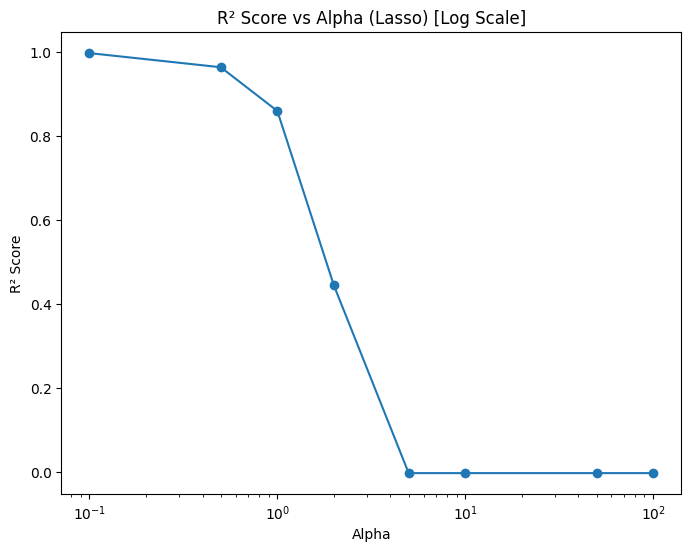

In [118]:
alphas = [0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 50.0, 100.0]

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_selected, y_train)
y_pred = lasso_model.predict(X_test_selected)

r2_scores = []
print("\nLasso Regression:")
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train_selected, y_train)
    y_pred = lasso_model.predict(X_test_selected)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
    print(f"Alpha: {alpha} | MSE: {mean_squared_error(y_test, y_pred):.4f} | R²: {r2:.4f}")

best_alpha = alphas[r2_scores.index(max(r2_scores))]
joblib.dump(Lasso(alpha=best_alpha).fit(X_train_selected, y_train), f'../models/best_lasso_alpha_{best_alpha}.pkl')
print(f"Best model saved with alpha={best_alpha} and R²={max(r2_scores):.4f}")

plt.figure(figsize=(8, 6))
plt.xscale('log')
plt.plot(alphas, r2_scores, marker='o')
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.title('R² Score vs Alpha (Lasso) [Log Scale]')    
plt.show()